# EDA

In [1]:
import pandas as pd

path = "../data/"

schedule = pd.read_csv(path+"processed/schedule.csv")
airports = pd.read_csv(path+"processed/airports.csv")
airlines = pd.read_csv(path+"processed/airlines.csv")

In [2]:
print(schedule.shape[0])
schedule.head()

566924


,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,CRS_ARR_TIME,ARR_TIME,CANCELLED,DIVERTED
0,2019-01-01,AA,PHX,MCO,2019-01-01 23:35:00,2019-01-01 23:32:00,2019-01-02 05:30:00,2019-01-02 05:25:00,0.0,0.0
1,2019-01-01,AA,DFW,SFO,2019-01-01 22:15:00,2019-01-01 22:12:00,2019-01-02 00:10:00,2019-01-02 00:47:00,0.0,0.0
2,2019-01-01,AA,LAX,IND,2019-01-01 22:57:00,2019-01-01 22:56:00,2019-01-02 06:01:00,2019-01-02 05:43:00,0.0,0.0
3,2019-01-01,AA,DFW,BUF,2019-01-01 20:30:00,2019-01-01 20:41:00,2019-01-02 00:22:00,2019-01-02 00:11:00,0.0,0.0
4,2019-01-01,AA,LAX,PHL,2019-01-01 21:45:00,2019-01-01 22:04:00,2019-01-02 05:52:00,2019-01-02 05:37:00,0.0,0.0


# Initial Observations

1. For how many days is our data collected?<br>
Data includes Jan 1st to Jan 31st 2019.

In [3]:
schedule["FL_DATE"].unique()

array(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
       '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
       '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
       '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
       '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
       '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
       '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
       '2019-01-29', '2019-01-30', '2019-01-31'], dtype=object)

2. What country does the data belong to?<br>
Data is based on USA and near by Islands.

In [4]:
temp = pd.DataFrame(pd.concat([schedule["ORIGIN"], schedule["DEST"]]), columns=["IATA"]).merge(airports, how="left", left_on="IATA", right_on="IATA")
print(temp["Country"].unique())
temp = None

['United States' 'Puerto Rico' 'American Samoa' 'Virgin Islands' 'Guam'
 'Northern Mariana Islands']


# Basic Statistics

## 1. Time Series

### 1. Flights per day

In [5]:
temp = pd.DataFrame(schedule.groupby("FL_DATE")["ORIGIN"].count())
temp.reset_index(inplace=True)
temp.columns = ["Date", "No of flights"]
temp["Day"] = pd.to_datetime(temp["Date"]).dt.day
temp["Day of week"] = pd.to_datetime(temp["Date"]).dt.strftime("%a")

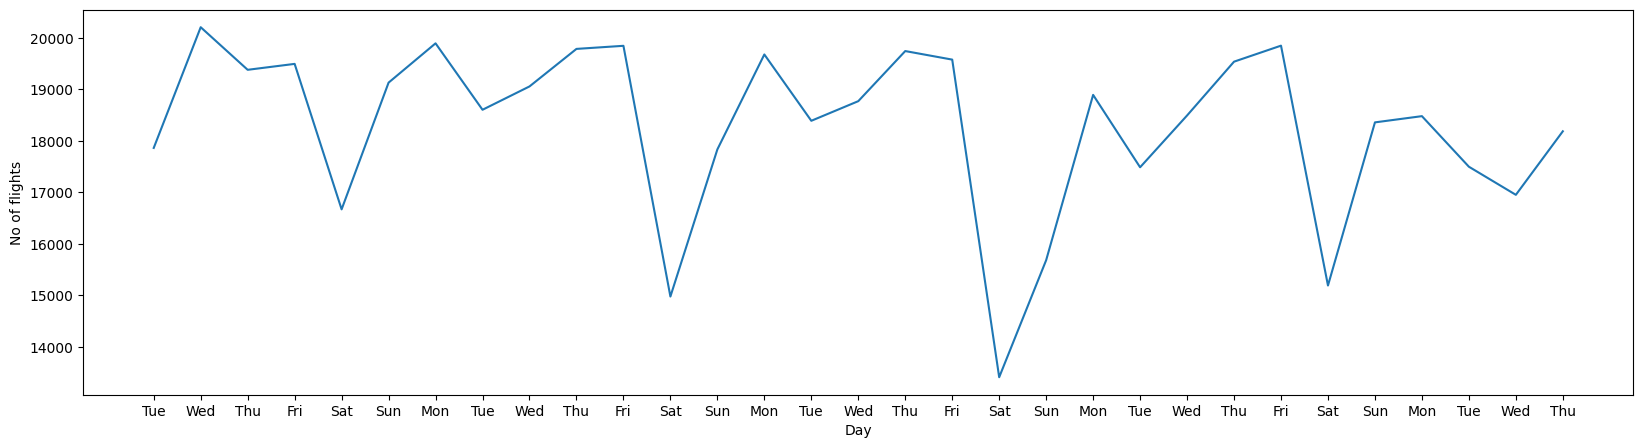

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 5))
p = sns.lineplot(data=temp, x="Day", y="No of flights")
p.set_xticks(temp["Day"], labels=temp["Day of week"])
plt.show()

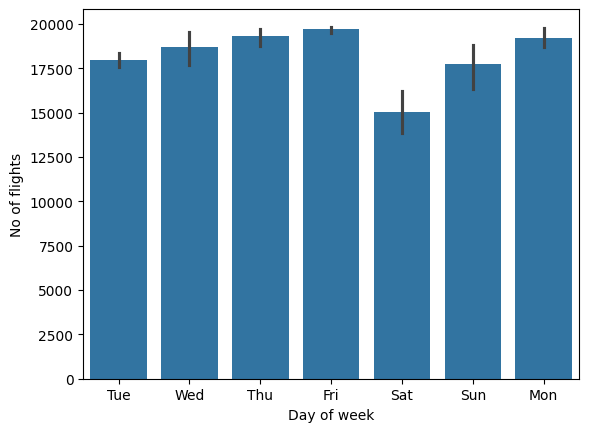

In [7]:
p = sns.barplot(data=temp, x="Day of week", y="No of flights")
plt.show()
temp = None

### 2. Flights by country

#### Inbound + Outbound

In [8]:
temp = pd.DataFrame(pd.concat([schedule["ORIGIN"], schedule["DEST"]]), columns=["IATA"]).merge(airports, how="left", left_on="IATA", right_on="IATA")
print(temp["Country"].value_counts())
temp = None

Country
United States               1127637
Puerto Rico                    5093
Virgin Islands                  872
Guam                            142
Northern Mariana Islands         82
American Samoa                   22
Name: count, dtype: int64


#### Inbound

In [9]:
temp = pd.DataFrame(schedule["DEST"])
temp.columns = ["IATA"]
temp = temp.merge(airports, how="left", left_on="IATA", right_on="IATA")
print(temp["Country"].value_counts())
temp = None

Country
United States               563824
Puerto Rico                   2541
Virgin Islands                 436
Guam                            71
Northern Mariana Islands        41
American Samoa                  11
Name: count, dtype: int64


#### Outbound

In [10]:
temp = pd.DataFrame(schedule["ORIGIN"])
temp.columns = ["IATA"]
temp = temp.merge(airports, how="left", left_on="IATA", right_on="IATA")
print(temp["Country"].value_counts())
temp = None

Country
United States               563813
Puerto Rico                   2552
Virgin Islands                 436
Guam                            71
Northern Mariana Islands        41
American Samoa                  11
Name: count, dtype: int64


### 3. Flights by city

#### Inbound + Outbound

In [11]:
temp = pd.DataFrame(pd.concat([schedule["ORIGIN"], schedule["DEST"]]), columns=["IATA"]).merge(airports, how="left", left_on="IATA", right_on="IATA")
print(temp["City"].value_counts())
temp = None

City
Atlanta              61651
Chicago              57951
New York             47285
Dallas-Fort Worth    45502
Houston              38777
                     ...  
Ogdensburg              20
Hagerstown              20
Owensboro               18
Adak Island             18
Ogden                   16
Name: count, Length: 334, dtype: int64


#### Inbound

In [12]:
temp = pd.DataFrame(schedule["DEST"])
temp.columns = ["IATA"]
temp = temp.merge(airports, how="left", left_on="IATA", right_on="IATA")
print(temp["City"].value_counts())
temp = None

City
Atlanta              30818
Chicago              28939
New York             23635
Dallas-Fort Worth    22742
Houston              19365
                     ...  
Hagerstown              10
Ogdensburg              10
Owensboro                9
Adak Island              9
Ogden                    8
Name: count, Length: 334, dtype: int64


#### Outbound

In [13]:
temp = pd.DataFrame(schedule["ORIGIN"])
temp.columns = ["IATA"]
temp = temp.merge(airports, how="left", left_on="IATA", right_on="IATA")
print(temp["City"].value_counts())
temp = None

City
Atlanta              30833
Chicago              29012
New York             23650
Dallas-Fort Worth    22760
Houston              19412
                     ...  
Ogdensburg              10
Hagerstown              10
Owensboro                9
Adak Island              9
Ogden                    8
Name: count, Length: 334, dtype: int64


### 4. Flights by airlines

In [14]:
temp = pd.DataFrame(schedule["OP_CARRIER"].value_counts()).reset_index()
temp.shape
temp.columns = ["IATA", "Count"]
temp = temp.merge(airlines, how="left", left_on="IATA", right_on="IATA")
print(temp[["Name", "Count"]])
temp = None

                           Name   Count
0            Southwest Airlines  107318
1             American Airlines   75498
2               Delta Air Lines   73503
3                       SkyWest   61956
4               United Airlines   46213
5                           NaN   24621
6       American Eagle Airlines   23751
7               JetBlue Airways   23451
8                        Comair   22395
9               Alaska Airlines   20263
10            Pinnacle Airlines   19849
11                Mesa Airlines   17861
12              Spirit Airlines   15021
13  Atlantic Southeast Airlines   12227
14            Frontier Airlines    9496
15            Hawaiian Airlines    6789
16                Allegiant Air    6712


### 5. Late Arrivals

In [30]:
schedule["CRS_DEP_TIME"] = pd.to_datetime(schedule["CRS_DEP_TIME"])
schedule["DEP_TIME"] = pd.to_datetime(schedule["DEP_TIME"])
schedule["CRS_ARR_TIME"] = pd.to_datetime(schedule["CRS_ARR_TIME"])
schedule["ARR_TIME"] = pd.to_datetime(schedule["ARR_TIME"])

In [ ]:
temp1 = schedule[schedule["CRS_ARR_TIME"] < schedule["ARR_TIME"]] # late
temp2 = schedule[schedule["CRS_ARR_TIME"] >= schedule["ARR_TIME"]] # on time or early

print("% Flights with late arrivals              ", temp1.shape[0] / schedule.shape[0])
print("% Flights with on time or early arrivals  ", temp2.shape[0] / schedule.shape[0])
print("Average delay in arrivals                 ", (temp1["ARR_TIME"] - temp1["CRS_ARR_TIME"]).mean())
temp1 = None
temp2 = None

% Flights with late arrivals               0.3409151843986143
% Flights with on time or early arrivals   0.6590848156013858
Average delay in arrival                   0 days 00:47:10.320324101


### 6. Late Departures

In [36]:
temp1 = schedule[schedule["CRS_DEP_TIME"] < schedule["DEP_TIME"]] # late
temp2 = schedule[schedule["CRS_DEP_TIME"] >= schedule["DEP_TIME"]] # on time or early

print("% Flights with late departures              ", temp1.shape[0] / schedule.shape[0])
print("% Flights with on time or early departures  ", temp2.shape[0] / schedule.shape[0])
print("Average delay in departures                 ", (temp1["DEP_TIME"] - temp1["CRS_DEP_TIME"]).mean())
temp1 = None
temp2 = None

% Flights with late departures               0.32305917548031127
% Flights with on time or early departures   0.6769408245196887
Average delay in departures                  0 days 00:37:18.788861588


### 7. Late Arrivals by day

In [72]:
temp1 = schedule[schedule["CRS_ARR_TIME"] < schedule["ARR_TIME"]] # late
temp2 = schedule[schedule["CRS_ARR_TIME"] >= schedule["ARR_TIME"]] # on time or early

temp1 = temp1.groupby("FL_DATE")["OP_CARRIER"].count()
temp2 = temp2.groupby("FL_DATE")["OP_CARRIER"].count()
temp = schedule.groupby("FL_DATE")["OP_CARRIER"].count()

temp1 = pd.DataFrame(temp1 / temp).reset_index()
temp2 = pd.DataFrame(temp2 / temp).reset_index()

temp = temp1.merge(temp2, how="inner", left_on="FL_DATE", right_on="FL_DATE")
temp1 = None
temp2 = None
temp.head()

,FL_DATE,OP_CARRIER_x,OP_CARRIER_y
0,2019-01-01,0.384818,0.615182
1,2019-01-02,0.451180,0.548820
2,2019-01-03,0.365635,0.634365
3,2019-01-04,0.290895,0.709105
4,2019-01-05,0.308098,0.691902


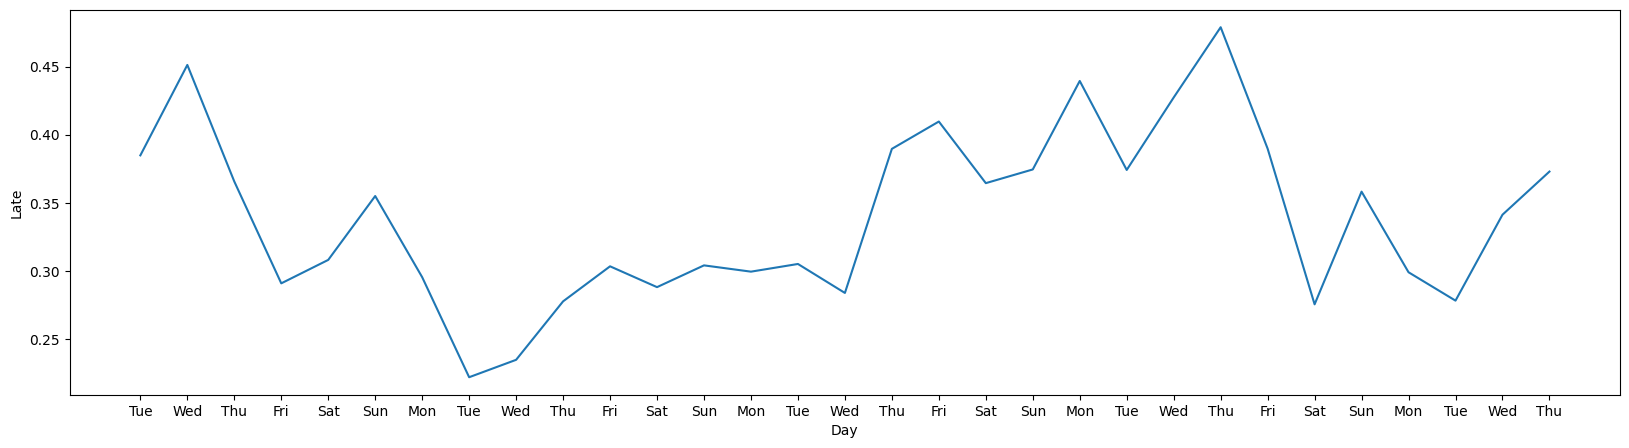

In [ ]:
temp.columns = ["Date", "Late", "On Time"]
temp["Day"] = pd.to_datetime(temp["Date"]).dt.day
temp["Day of week"] = pd.to_datetime(temp["Date"]).dt.strftime("%a")

plt.figure(figsize=(20, 5))
p = sns.lineplot(data=temp, x="Day", y="Late")
p.set_xticks(temp["Day"], labels=temp["Day of week"])
plt.show()
temp = None

### 8. Late Departures by day

In [74]:
temp1 = schedule[schedule["CRS_DEP_TIME"] < schedule["DEP_TIME"]] # late
temp2 = schedule[schedule["CRS_DEP_TIME"] >= schedule["DEP_TIME"]] # on time or early

temp1 = temp1.groupby("FL_DATE")["OP_CARRIER"].count()
temp2 = temp2.groupby("FL_DATE")["OP_CARRIER"].count()
temp = schedule.groupby("FL_DATE")["OP_CARRIER"].count()

temp1 = pd.DataFrame(temp1 / temp).reset_index()
temp2 = pd.DataFrame(temp2 / temp).reset_index()

temp = temp1.merge(temp2, how="inner", left_on="FL_DATE", right_on="FL_DATE")
temp1 = None
temp2 = None
temp.head()

,FL_DATE,OP_CARRIER_x,OP_CARRIER_y
0,2019-01-01,0.394671,0.605329
1,2019-01-02,0.444499,0.555501
2,2019-01-03,0.376677,0.623323
3,2019-01-04,0.301154,0.698846
4,2019-01-05,0.320816,0.679184


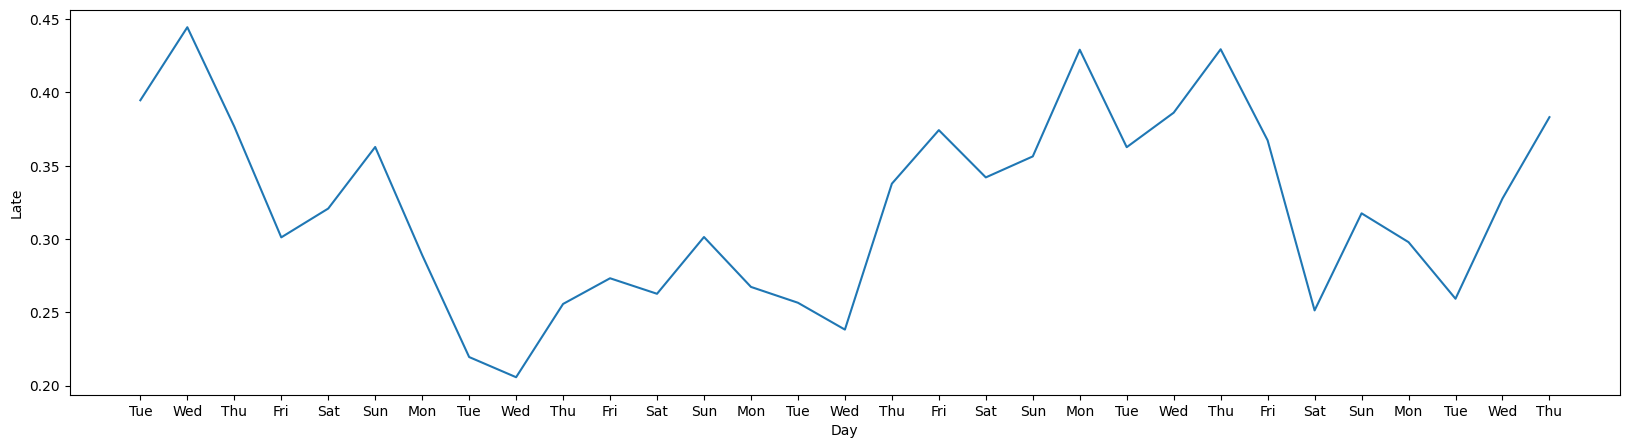

In [75]:
temp.columns = ["Date", "Late", "On Time"]
temp["Day"] = pd.to_datetime(temp["Date"]).dt.day
temp["Day of week"] = pd.to_datetime(temp["Date"]).dt.strftime("%a")

plt.figure(figsize=(20, 5))
p = sns.lineplot(data=temp, x="Day", y="Late")
p.set_xticks(temp["Day"], labels=temp["Day of week"])
plt.show()
temp = None

### 9. Late Arrivals by city

In [78]:
# temp1 = schedule[schedule["CRS_ARR_TIME"] < schedule["ARR_TIME"]] # late
# temp2 = schedule[schedule["CRS_ARR_TIME"] >= schedule["ARR_TIME"]] # on time or early

# temp1 = temp1.groupby("City")["OP_CARRIER"].count()
# temp2 = temp2.groupby("City")["OP_CARRIER"].count()
# temp = schedule.groupby("City")["OP_CARRIER"].count()

# temp

# Analytical Questions

# Notes
1. Saturday has lowest flights of the week. Followed by Sunday and Tuesday.